## sklearn DT
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- criterion：特征选择标准，可选参数，默认是gini，可以设置为entropy。gini是基尼不纯度，是将来自集合的某种结果随机应用于某一数据项的预期误差率，是一种基于统计的思想。entropy是香农熵，也就是上篇文章讲过的内容，是一种基于信息论的思想。Sklearn把gini设为默认参数，应该也是做了相应的斟酌的，精度也许更高些？ID3算法使用的是entropy，CART算法使用的则是gini。

- splitter：特征划分点选择标准，可选参数，默认是best，可以设置为random。每个结点的选择策略。best参数是根据算法选择最佳的切分特征，例如gini、entropy。random随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"。

- max_features：划分时考虑的最大特征数，可选参数，默认是None。寻找最佳切分时考虑的最大特征数(n_features为总共的特征数)，有如下6种情况：
    - 如果max_features是整型的数，则考虑max_features个特征；
    - 如果max_features是浮点型的数，则考虑int(max_features * n_features)个特征；
    - 如果max_features设为auto，那么max_features = sqrt(n_features)；
    - 如果max_features设为sqrt，那么max_featrues = sqrt(n_features)，跟auto一样；
    - 如果max_features设为log2，那么max_features = log2(n_features)；
    - 如果max_features设为None，那么max_features = n_features，也就是所有特征都用。
    一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。
- max_depth：决策树最大深，可选参数，默认是None。这个参数是这是树的层数的。层数的概念就是，比如在贷款的例子中，决策树的层数是2层。如果这个参数设置为None，那么决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。或者如果设置了min_samples_slipt参数，那么直到少于min_smaples_split个样本为止。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

- min_samples_split：内部节点再划分所需最小样本数，可选参数，默认是2。这个值限制了子树继续划分的条件。如果min_samples_split为整数，那么在切分内部结点的时候，min_samples_split作为最小的样本数，也就是说，如果样本已经少于min_samples_split个样本，则停止继续切分。如果min_samples_split为浮点数，那么min_samples_split就是一个百分比，ceil(min_samples_split * n_samples)，数是向上取整的。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

- min_samples_leaf：叶子节点最少样本数，可选参数，默认是1。这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。叶结点需要最少的样本数，也就是最后到叶结点，需要多少个样本才能算一个叶结点。如果设置为1，哪怕这个类别只有1个样本，决策树也会构建出来。如果min_samples_leaf是整数，那么min_samples_leaf作为最小的样本数。如果是浮点数，那么min_samples_leaf就是一个百分比，同上，celi(min_samples_leaf * n_samples)，数是向上取整的。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

- min_weight_fraction_leaf：叶子节点最小的样本权重和，可选参数，默认是0。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

- max_leaf_nodes：最大叶子节点数，可选参数，默认是None。通过限制最大叶子节点数，可以防止过拟合。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

- class_weight：类别权重，可选参数，默认是None，也可以字典、字典列表、balanced。指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。类别的权重可以通过{class_label：weight}这样的格式给出，这里可以自己指定各个样本的权重，或者用balanced，如果使用balanced，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的None。

- random_state：可选参数，默认是None。随机数种子。如果是证书，那么random_state会作为随机数生成器的随机数种子。随机数种子，如果没有设置随机数，随机出来的数与当前系统时间有关，每个时刻都是不同的。如果设置了随机数种子，那么相同随机数种子，不同时刻产生的随机数也是相同的。如果是RandomState instance，那么random_state是随机数生成器。如果为None，则随机数生成器使用np.random。

- min_impurity_split：节点划分最小不纯度,可选参数，默认是1e-7。这是个阈值，这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。

- presort：数据是否预排序，可选参数，默认为False，这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。

除了这些参数要注意以外，其他在调参时的注意点有：

    - 当样本数量少但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型
    - 如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。- 这样特征的维度会大大减小。再来拟合决策树模型效果会好。
    - 推荐多用决策树的可视化，同时先限制决策树的深度，这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。
    - 在训练模型时，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。
    - 决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。
    - 如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

sklearn.tree.DecisionTreeClassifier()提供了一些方法：
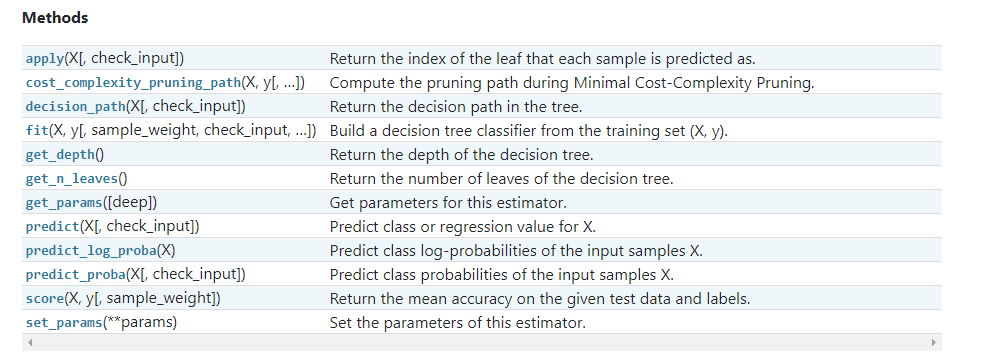

## 预测隐形眼镜类型

隐形眼镜数据集是非常著名的数据集，它包含很多换着眼部状态的观察条件以及医生推荐的隐形眼镜类型。隐形眼镜类型包括硬材质(hard)、软材质(soft)以及不适合佩戴隐形眼镜(no lenses)。

一共有24组数据，数据的Labels依次是age、prescript、astigmatic、tearRate、class，也就是第一列是年龄，第二列是症状，第三列是是否散光，第四列是眼泪数量，第五列是最终的分类标签。

In [1]:
import pandas as pd
rootdir = 'D:/Github/ML-Algorithm-Source-Code/dataset/'
filepath = rootdir + 'Glasses.txt'
df_glass = pd.read_table(filepath, header=None)
df_glass.head().append(df_glass.tail())

,0,1,2,3,4
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses
19,presbyopic,myope,yes,normal,hard
20,presbyopic,hyper,no,reduced,no lenses
21,presbyopic,hyper,no,normal,soft
22,presbyopic,hyper,yes,reduced,no lenses
23,presbyopic,hyper,yes,normal,no lenses


In [2]:
# 保存样本
df_glass_features = df_glass.iloc[:, :4]
# 保存标签
df_glass_label = df_glass.iloc[:, -1]

glass_labels = ['age', 'prescript', 'astigmatic', 'tearRate']
df_glass_features.columns = glass_labels
df_glass_features

,age,prescript,astigmatic,tearRate
0,young,myope,no,reduced
1,young,myope,no,normal
2,young,myope,yes,reduced
3,young,myope,yes,normal
4,young,hyper,no,reduced
5,young,hyper,no,normal
6,young,hyper,yes,reduced
7,young,hyper,yes,normal
8,pre,myope,no,reduced
9,pre,myope,no,normal


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# 标签编码 str --> int number
for col in df_glass_features.columns:
    df_glass_features.loc[:, col] = le.fit_transform(df_glass_features.loc[:, col])
df_glass_features

D:\anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,prescript,astigmatic,tearRate
0,2,1,0,1
1,2,1,0,0
2,2,1,1,1
3,2,1,1,0
4,2,0,0,1
5,2,0,0,0
6,2,0,1,1
7,2,0,1,0
8,0,1,0,1
9,0,1,0,0


In [5]:
!pip install pydotplus

Graphviz不能使用pip进行安装，我们需要手动安装，下载地址：https://www.graphviz.org

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(df_glass_features.values.tolist(), df_glass_label)

DecisionTreeClassifier()

In [8]:
from six import StringIO
import pydotplus

dot_data = StringIO()
# 绘制决策树
tree.export_graphviz(clf, out_file = dot_data,
                     feature_names = df_glass_features.keys(),
                     class_names = clf.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("05 DecisionTree_GlassType.pdf")

True

In [9]:
graph

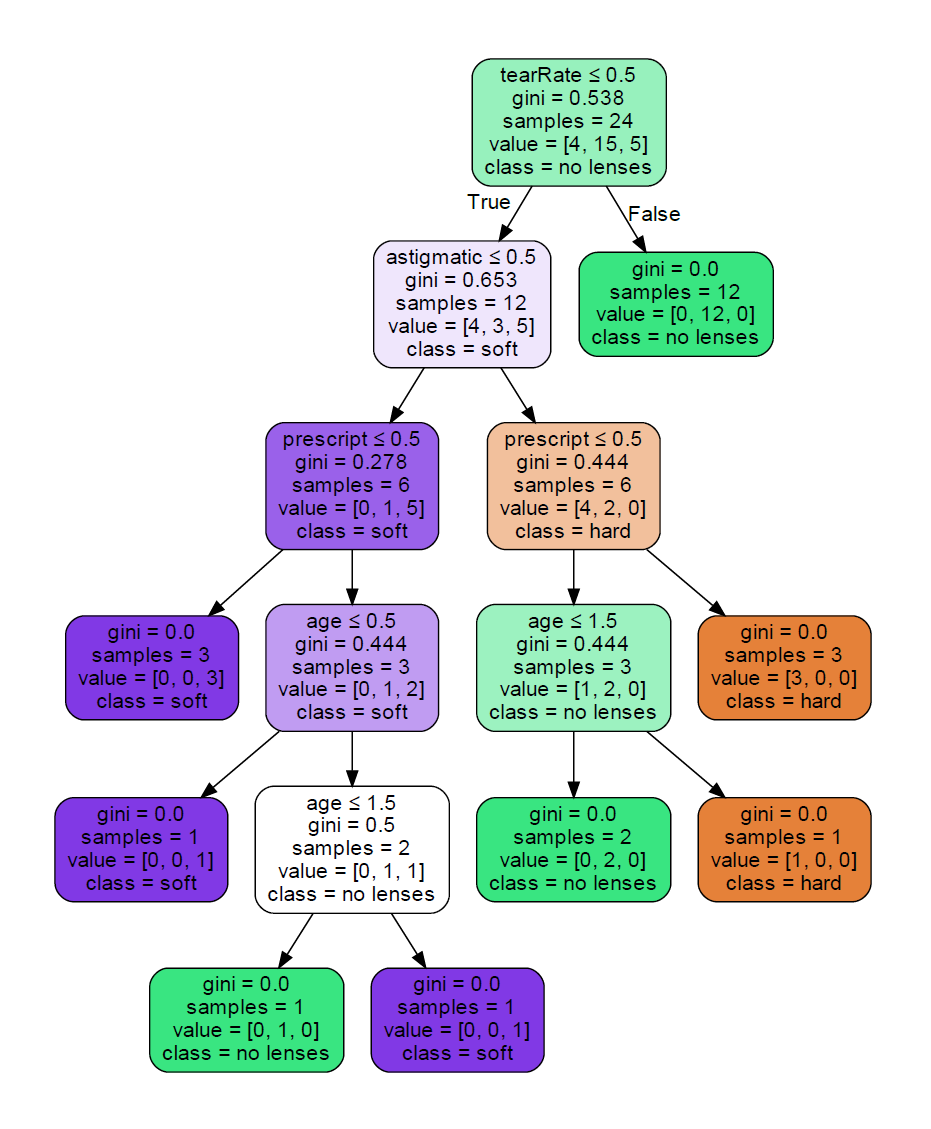

确定好决策树之后就可以做预测了。可以根据自己的眼睛情况和年龄等特征，看一看自己适合何种材质的隐形眼镜:

In [10]:
print(clf.predict([[1, 1, 1, 0]]))

['hard']
